**FINE-TUNING PRETRAINED BERT FOR SENTIMENT CLASSIFICATION WITH HUGGING FACE**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!ls


drive  logs  results  sample_data  wandb


# New section

In [2]:
# Example: Texts to classify
texts = [
    "This product is great!",
    "I am very disappointed with the service.",
    "The quality of this item is okay, not bad."
]


In [3]:
# Import the Hugging Face transformers pipeline function
from transformers import pipeline

# Load a pretrained sentiment analysis pipeline (uses a BERT-based model by default)
sentiment_pipeline = pipeline("sentiment-analysis")

# Run sentiment analysis on the input list of texts
sentiment_pipeline(texts)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998793601989746},
 {'label': 'NEGATIVE', 'score': 0.9997695088386536},
 {'label': 'POSITIVE', 'score': 0.9989179372787476}]

In [4]:
# Import the pipeline function from Hugging Face Transformers
from transformers import pipeline

# Load a specific pretrained sentiment analysis model (BERTweet) from Hugging Face
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# Run the sentiment analysis pipeline on a list of text inputs
specific_model(texts)  # 'texts' should be a list of strings, e.g., ["I love this!", "This is bad."]



config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


[{'label': 'POS', 'score': 0.992783784866333},
 {'label': 'NEG', 'score': 0.9813655614852905},
 {'label': 'POS', 'score': 0.9307525157928467}]

In [10]:
# Import the pandas library to handle data operations
import pandas as pd

# Load the IMDB dataset from a parquet file stored in Hugging Face Datasets
# The dataset is used for sentiment analysis
df = pd.read_parquet("hf://datasets/stanfordnlp/imdb/plain_text/train-00000-of-00001.parquet")

# Display the first few rows of the DataFrame to inspect the loaded data
df.head()


,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0
...,...,...
24995,A hit at the time but now better categorised a...,1
24996,I love this movie like no other. Another time ...,1
24997,This film and it's sequel Barry Mckenzie holds...,1
24998,'The Adventures Of Barry McKenzie' started lif...,1


In [11]:
# Select only the 'text' and 'label' columns from the dataset for sentiment classification
df = df[['text', 'label']]

# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0
...,...,...
24995,A hit at the time but now better categorised a...,1
24996,I love this movie like no other. Another time ...,1
24997,This film and it's sequel Barry Mckenzie holds...,1
24998,'The Adventures Of Barry McKenzie' started lif...,1


In [12]:
# Train-Test Split
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
#  Convert to Hugging Face Datasets
from datasets import Dataset

train_dataset = Dataset.from_pandas(train_df.reset_index(drop=True))
test_dataset = Dataset.from_pandas(test_df.reset_index(drop=True))


In [14]:
#  Tokenize
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding=True)

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [15]:
#  Rename 'label' column to 'labels'
tokenized_train = tokenized_train.rename_column("label", "labels")
tokenized_test = tokenized_test.rename_column("label", "labels")


In [16]:
# Import the AutoTokenizer class from the Hugging Face transformers library
from transformers import AutoTokenizer

# Load the pre-trained DistilBERT tokenizer. This tokenizer is used to tokenize the input text
# The model "distilbert-base-uncased" is a smaller version of BERT, known for its faster performance and similar accuracy.
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")


In [17]:
#  Set format for PyTorch
tokenized_train.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
tokenized_test.set_format("torch", columns=["input_ids", "attention_mask", "labels"])


In [18]:
from transformers import DataCollatorWithPadding

# Data collator for padding the inputs to the same length
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


In [19]:
# Step 7: Load model
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
# Import necessary libraries
import numpy as np
from datasets import load_metric

# Define the function to compute evaluation metrics (accuracy and F1 score)
def compute_metrics(eval_pred):
    # Load the accuracy and F1 score metrics from Hugging Face's datasets library
    load_accuracy = load_metric("accuracy")
    load_f1 = load_metric("f1")

    # Extract the logits and labels from the evaluation predictions
    logits, labels = eval_pred

    # Convert logits to predicted labels by taking the argmax (index of max value) across the last axis
    predictions = np.argmax(logits, axis=-1)

    # Compute accuracy using the loaded accuracy metric
    accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]

    # Compute F1 score using the loaded F1 metric
    f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]

    # Return a dictionary with the computed metrics
    return {"accuracy": accuracy, "f1": f1}



In [21]:
from transformers import TrainingArguments, Trainer

# Step 5: Define the Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir="./logs",
    logging_steps=10,
)

# Step 6: Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
)

# Step 7: Train the model
trainer.train()


/tmp/ipython-input-21-2102034091.py:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: tifangdesmond13 (tifangdesmond13-cz-stochowa) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
10,0.702200
20,0.677900
30,0.678200
40,0.448400
50,0.277400
60,0.398900
70,0.497600
80,0.454700
90,0.288700
100,0.548900


TrainOutput(global_step=5000, training_loss=0.25446128217726943, metrics={'train_runtime': 4002.2179, 'train_samples_per_second': 9.994, 'train_steps_per_second': 1.249, 'total_flos': 1.05244422144e+16, 'train_loss': 0.25446128217726943, 'epoch': 2.0})

In [22]:
# Step 10: Evaluate
trainer.evaluate()

{'eval_loss': 0.2619200050830841,
 'eval_runtime': 152.5566,
 'eval_samples_per_second': 32.775,
 'eval_steps_per_second': 4.097,
 'epoch': 2.0}

In [23]:
from sklearn.metrics import classification_report
import numpy as np

preds_output = trainer.predict(tokenized_test)
preds = np.argmax(preds_output.predictions, axis=1)

# Assuming tokenized_test has 'label' field
labels = preds_output.label_ids

print(classification_report(labels, preds))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2515
           1       0.94      0.94      0.94      2485

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



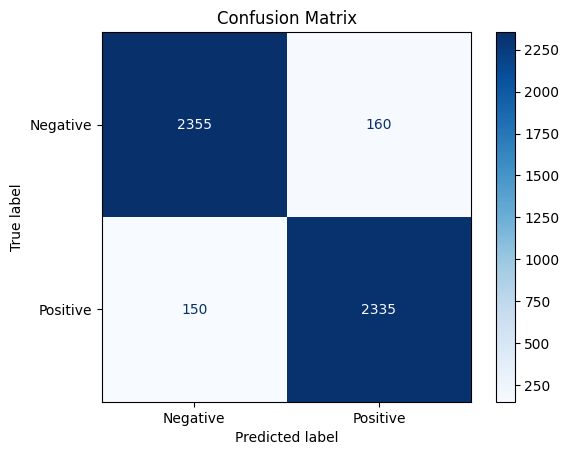

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Get predictions from the trainer
predictions = trainer.predict(tokenized_test)
y_pred = predictions.predictions.argmax(-1)
y_true = predictions.label_ids

# Step 2: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 3: Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [5]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Assume your model and tokenizer are already defined
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Train the model (not shown)

# Save the model and tokenizer to the specified directory
model.save_pretrained("/content/sample_data/BERT SENTIMENT ANALYSIS")
tokenizer.save_pretrained("/content/sample_data/BERT SENTIMENT ANALYSIS")


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

('/content/sample_data/BERT SENTIMENT ANALYSIS/tokenizer_config.json',
 '/content/sample_data/BERT SENTIMENT ANALYSIS/special_tokens_map.json',
 '/content/sample_data/BERT SENTIMENT ANALYSIS/vocab.txt',
 '/content/sample_data/BERT SENTIMENT ANALYSIS/added_tokens.json',
 '/content/sample_data/BERT SENTIMENT ANALYSIS/tokenizer.json')